In [15]:
from PIL import Image
import os
import numpy as np

def read_images(directory):
    image_data = []
    for file in os.listdir(directory):
        if file.endswith(".jpg"):
            image_path = os.path.join(directory, file)
            image = Image.open(image_path)
            pixel_data = np.array(image)
            image_data.append(pixel_data)
    return image_data

# 128 * 128 images
directory_path = "/kaggle/input/image-classification/images/images/architecure"
image_data_list = read_images(directory_path)
print(len(image_data_list))

8763


In [21]:
def add_gaussian_noise(image_data, mean=0, std=1):
    noise = np.random.normal(mean, std, image_data.shape)
    noisy_image = image_data + noise
    noisy_image = np.clip(noisy_image, 0, 255)  
    return noisy_image.astype(np.uint8)  

# Choose first 100 images
first_100_images = image_data_list[:100]

# Add Gaussian noise to each image
noisy_images = [add_gaussian_noise(image, std=20) for image in first_100_images]


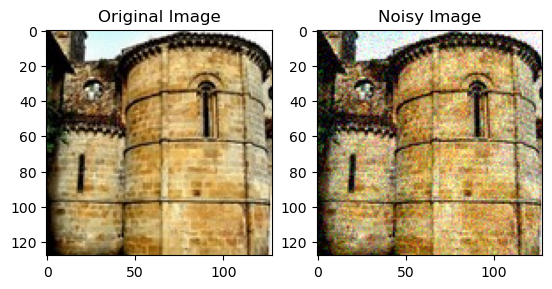

In [22]:
import matplotlib.pyplot as plt
import random

# Choose an index of the noisy image to display
index = random.randint(0, 100)

# Display the original and noisy images side by side
fig, ax = plt.subplots(1, 2)
ax[0].imshow(first_100_images[index], cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(noisy_images[index], cmap='gray')
ax[1].set_title('Noisy Image')
plt.show()
